In [12]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

Shape of the train data is:  (14384, 10)

Statistical Properties of the train data are as follows: 
                 Id           Age       Overall     Potential     Value (M)  \
count  14384.000000  14384.000000  14384.000000  14384.000000  14384.000000   
mean    8992.892728     25.148776     66.237695     71.181869      2.344967   
std     5183.996368      4.620911      6.954458      6.074111      5.105376   
min        0.000000     16.000000     46.000000     46.000000      0.000000   
25%     4480.750000     21.000000     62.000000     67.000000      0.300000   
50%     9001.500000     25.000000     66.000000     71.000000      0.675000   
75%    13470.250000     28.000000     71.000000     75.000000      2.100000   
max    17980.000000     47.000000     94.000000     94.000000    105.000000   

           Wage (M)  
count  14384.000000  
mean       0.011435  
std        0.022614  
min        0.000000  
25%        0.002000  
50%        0.004000  
75%        0.012000  
max        0

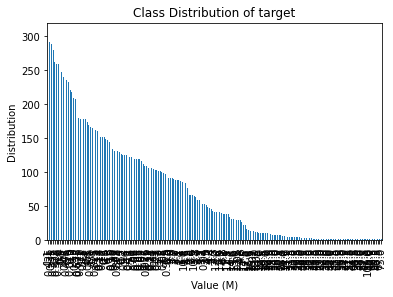

In [3]:
# read the dataset and extract the features and target separately

# Load the train data
train = pd.read_csv('train.csv')

# Shape of the data
print('Shape of the train data is: ',train.shape)

print()

# Statistical properties of the data.
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

# Drop the Id.
train.drop(['Id','Name','Nationality','Club','Position'],1,inplace=True)

# Checking for the distribution of the target
train['Value (M)'].value_counts().plot(kind='bar')
plt.title('Class Distribution of target')
plt.xlabel('Value (M)')
plt.ylabel('Distribution')

print()

# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [4]:
# check correlation
corr=train.corr()

# print correlation
print(corr)

                Age   Overall  Potential  Value (M)  Wage (M)
Age        1.000000  0.459678  -0.224055   0.082716  0.149757
Overall    0.459678  1.000000   0.678228   0.635618  0.589736
Potential -0.224055  0.678228   1.000000   0.595095  0.512910
Value (M)  0.082716  0.635618   0.595095   1.000000  0.845124
Wage (M)   0.149757  0.589736   0.512910   0.845124  1.000000


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [5]:
# code statr here

X = train.drop('Value (M)',axis=1)

# store dependent variable
y = train['Value (M)']

# spliting the dataframe

X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.3,random_state=8)

#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_val)


# Calculate r2_score
r2 = r2_score(y_val, y_pred)

#print r2
print(r2)

0.7532264477008926


In [9]:
# Predict the price of the house using a lasso regressor. Check if there is any improvement in the prediction.

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)

# calculate RMSE
r2_lasso = r2_score(y_val, lasso_pred)
print (r2_lasso)

0.4712999653671721


In [10]:
# Let's check the house price prediction using a ridge regressor.

# instantiate lasso model
ridge = Ridge()

# fit and predict
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)

# calculate RMSE)
r2_ridge = r2_score(y_val, ridge_pred)
print (r2_ridge)

0.7479414713481627


In [13]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: choosing estimators and their parameters.

# Initiate Linear Regression Model
regressor=LinearRegression()

# Initiate cross validation score
score= cross_val_score(regressor,X_train,y_train ,scoring= 'r2' ,cv=10)
print(score)
#calculate mean of the score
mean_score = np.mean(score)

# print mean score
print(mean_score)

[0.79758503 0.74959256 0.76238665 0.81407424 0.77163084 0.72984053
 0.72219165 0.63460243 0.8066206  0.73447859]
0.7523003108586785


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [6]:
# Code Start here

# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Applying the same transformation on test data
test.drop(['Id','Name','Nationality','Club','Position'],1,inplace=True)

# Predict on the test data using the best model
y_pred_test = model.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('FIFAsubmission1.csv',index=False)

# Code end here

NameError: name 'model' is not defined